In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import pandas as pd

2.a

In [12]:
# Data points
X = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])


# Unpack the points
x, y = zip(*X)

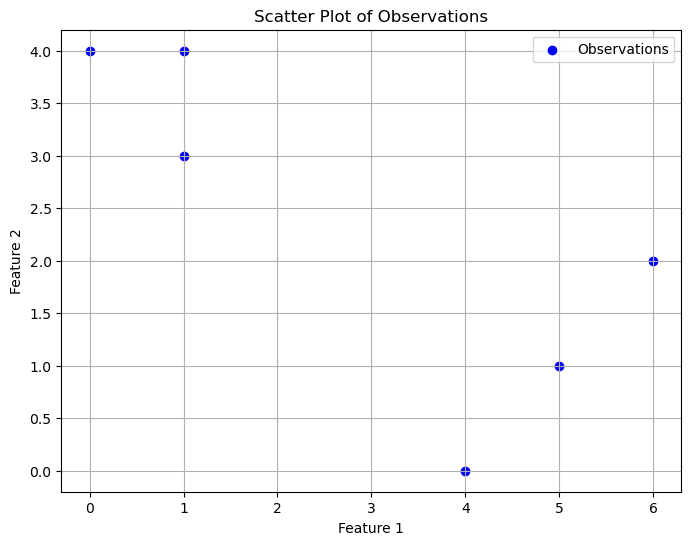

In [13]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Observations')
plt.title('Scatter Plot of Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

2.b

In [14]:
np.random.seed(1) 
cluster_labels = np.random.choice([0, 1], size=len(X))
cluster_labels.dtype

dtype('int32')

2.c

In [15]:
# Compute centroids

centroids = []
for i in range(2):  # Since K=2
    cluster_points = X[cluster_labels == i]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids

[array([2.5, 2.5]), array([3.  , 2.25])]

2.d

In [16]:
def assign_to_centroids(X, centroids):
    labels = []
    for x in X:
        # Compute distances from this point to each centroid
        distances = np.linalg.norm(x - centroids, axis=1)
        # Assign the point to the closest centroid
        closest_centroid = np.argmin(distances)
        labels.append(closest_centroid)
    return np.array(labels)

# Assign each observation to the closest centroid
cluster_labels = assign_to_centroids(X, centroids)

cluster_labels

array([0, 0, 0, 1, 1, 1], dtype=int64)

2.e

In [17]:
# Function to compute centroids from cluster labels
def compute_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

# K-means function
def k_means(X, k, max_iter=100):
    # Randomly choose k data points as initial centroids
    np.random.seed(42)  # For reproducibility
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    
    for _ in range(max_iter):
        # Step 1: Assign each observation to the nearest centroid
        labels = assign_to_centroids(X, centroids)
        
        # Step 2: Compute the new centroids from the labels
        new_centroids = compute_centroids(X, labels, k)
        
        # Check for convergence (if centroids do not change)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

# Run K-means with K=2
k = 2
final_labels, final_centroids = k_means(X, k)

(final_labels, final_centroids)

(array([0, 0, 0, 1, 1, 1], dtype=int64),
 array([[0.66666667, 3.66666667],
        [5.        , 1.        ]]))

2.f

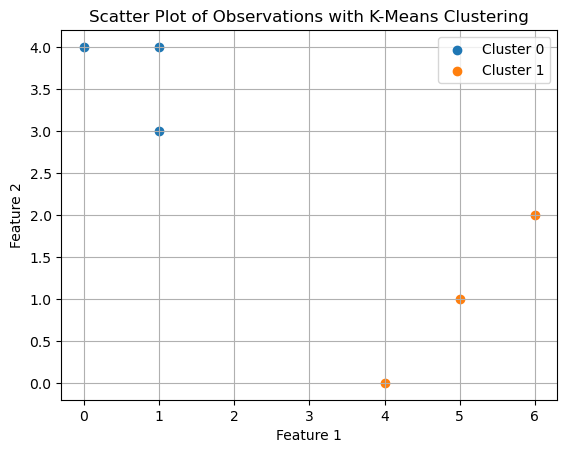

In [21]:
# Scatter plot for data points
for i in range(2):  # Loop through the clusters
    cluster_points = X[final_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('Scatter Plot of Observations with K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

3.a

In [32]:
# Fetch the Olivetti faces dataset
olivetti_faces = fetch_olivetti_faces()

# Convert the data to a DataFrame
df_data = pd.DataFrame(olivetti_faces.data)

# Add a column for the target labels to the DataFrame
df_data['target'] = olivetti_faces.target

In [33]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


3.b

In [34]:
# Calculate the mean of each feature (pixel) across all images
pixel_means = np.mean(olivetti_faces.data, axis=0)

# Demean the dataset by subtracting the mean of each feature from all images
demeaned_faces = olivetti_faces.data - pixel_means

# Verify by checking the new means (should be very close to 0)
new_pixel_means = np.mean(demeaned_faces, axis=0)

new_pixel_means

array([-5.9232114e-08,  8.8512898e-08,  1.0833144e-07, ...,
       -6.1392782e-08, -2.2321939e-07, -9.1791151e-08], dtype=float32)

3.c

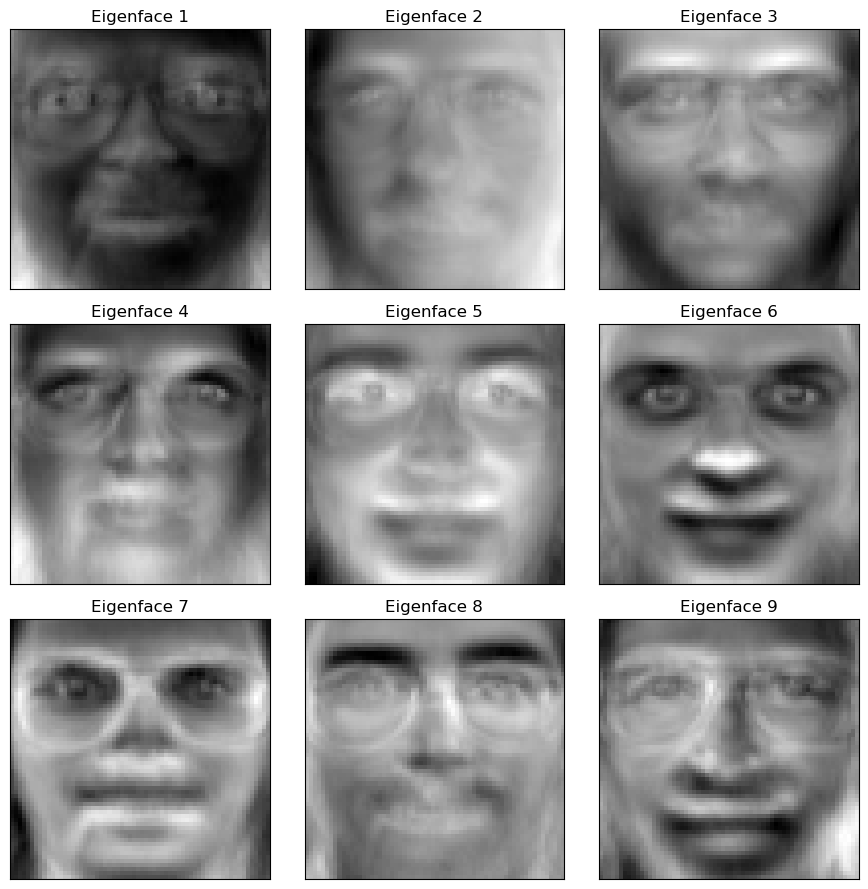

In [37]:
# Initialize a PCA model to compute the first 9 principal components
pca = PCA(n_components=9)

# Fit the PCA model on the demeaned faces data
pca.fit(demeaned_faces)

# Get the first 9 principal components (the eigenfaces)
eigenfaces = pca.components_.reshape((9, 64, 64))

# Display the first 9 eigenfaces
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Eigenface {i+1}')

plt.tight_layout()
plt.show()

3.d

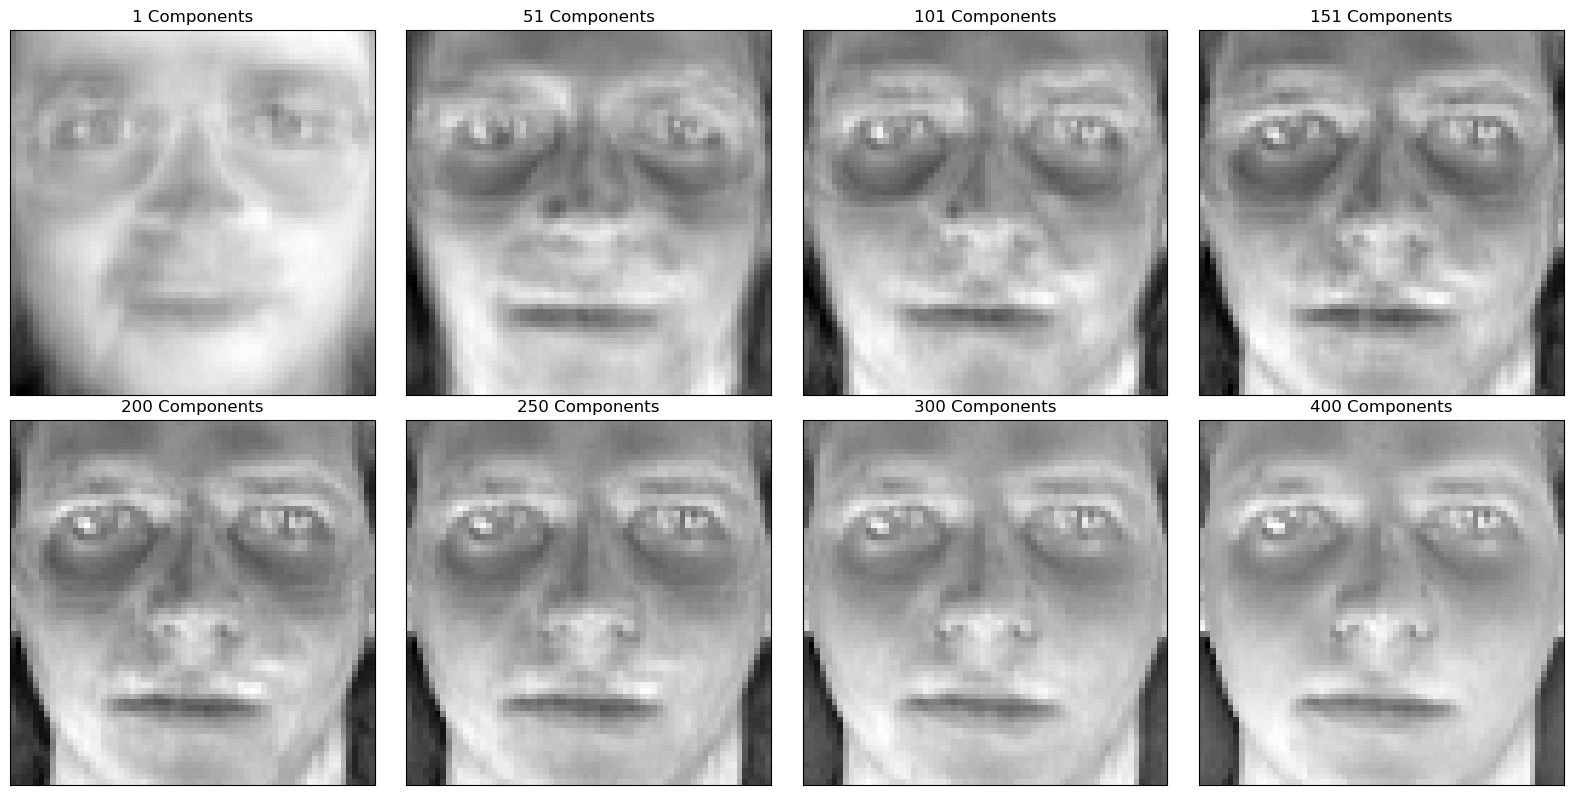

In [38]:
pca_full = PCA()
pca_full.fit(demeaned_faces)

# Select a face to reconstruct, here we choose the first face as an example
selected_face = demeaned_faces[0]

# Indices of components to use for reconstruction, progressively adding more components
components_to_use = [1, 51, 101, 151, 200, 250, 300, pca_full.n_components_]

# Initialize a figure for plotting
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, n_components in enumerate(components_to_use):
    # Transform the selected face to the principal component space
    transformed_face = pca_full.transform(selected_face.reshape(1, -1))
    
    # Zero out components beyond the first n_components to simulate reconstruction
    transformed_face[:, n_components:] = 0
    
    # Inverse transform to reconstruct the face using only the first n_components
    reconstructed_face = pca_full.inverse_transform(transformed_face)
    
    # Display the reconstructed face
    axes[i].imshow(reconstructed_face.reshape(64, 64), cmap='gray')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    title = f'{n_components} Components' if n_components <= pca_full.n_components_ else "All Components"
    axes[i].set_title(title)

plt.tight_layout()
plt.show()